## Comparison of QAOA with bitflips in quantum circuit
In this notebook the standard QAOA is compared to QAOA with a bitflip layer at each depth for a max cut problem.

In [1]:
from qaoa import QAOA, problems, mixers, initialstates

In [2]:
import numpy as np
import networkx as nx
import sys

sys.path.append("../")
from plotroutines import *

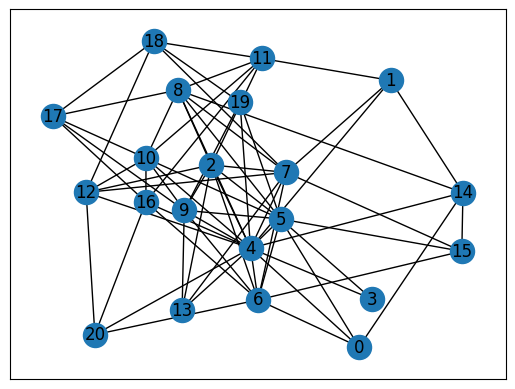

In [ ]:
G = nx.read_gml("data/w_ba_n21_k4_0.gml") # Load graph data for 21-node Barabasi-Albert graph with 4 edges per node
nx.draw_networkx(G)
mincost=-25.23404480588015  # Precalculated minimum cost (for comparison)

Create QAOA instances, whereas the first instance is initialized with `flip=True`, and the last is initialized with `flip=False`.

In [5]:
# flip = True
qaoa_flip = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxKCutBinaryPowerOfTwo(G=G, k_cuts=2),
    mixer=mixers.X(),
    flip=True,
)

# flip = False
qaoa = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxKCutBinaryPowerOfTwo(G=G, k_cuts=2),
    mixer=mixers.X(),
)

Run optimization until given max depth.

In [6]:
maxdepth = 10
qaoa_flip.optimize(depth=maxdepth)
qaoa.optimize(depth=maxdepth)

2025-06-30 14:08:11 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
2025-06-30 14:08:11 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2025-06-30 14:08:11 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2025-06-30 14:08:11 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2025-06-30 14:08:59 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2025-06-30 14:08:59 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2025-06-30 14:09:03 [info     ] cost(depth 1 = -19.73118161648724 file=qaoa.qaoa func=optimize
2025-06-30 14:09:17 [info     ] cost(depth 2 = -21.073730789308986 file=qaoa.qaoa func=optimize
2025-06-30 14:09:38 [info     ] cost(depth 3 = -21.925770998400285 file=qaoa.qaoa func=optimize
2025-06-30 14:10:18 [info     ] cost(depth 4 = -22.5234760951693

Plot approximation ratio.

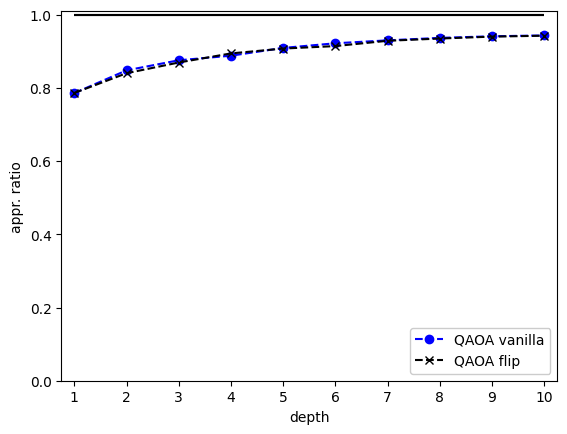

In [7]:
import matplotlib.pyplot as pl

fig = pl.figure()
plot_ApproximationRatio(
    qaoa,
    maxdepth,
    mincost=-25.23404480588015,
    maxcost=0,
    label="QAOA vanilla",
    style="o--b",
    fig=fig,
)
plot_ApproximationRatio(
    qaoa_flip,
    maxdepth,
    mincost=-25.23404480588015,
    maxcost=0,
    label="QAOA flip",
    style="x--k",
    fig=fig,
)